In [1]:
import torch
from torch.utils.data import DataLoader
from torch.optim import SGD 

from datasets import load_dataset, load_metric

import matplotlib.pyplot as plt

import json


In [2]:
import utils_generic as generic
import multitask_simple as mt
import model_confs as confs

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.manual_seed(27)
tasks = ['to','as','about']

# Datos ConvAI

In [4]:
with open('Datasets\ConvAI2\convai2_complete.json','r') as f:
    data = json.load(f)

In [5]:
convai_train = data['train']
convai_val = data['validation']



convai_train_token = generic.tokenize_dataset(convai_train,tasks,"distilbert-base-uncased") 
convai_val_token = generic.tokenize_dataset(convai_val,tasks,"distilbert-base-uncased") 

In [6]:
convai_train_dataset = mt.DatasetMultiTaskSimple(convai_train_token,tasks,eval=False)
convai_val_dataset = mt.DatasetMultiTaskSimple(convai_val_token,tasks,eval=False)

# Datos md_gender

In [7]:
with open('Datasets\md_gender\md_complete.json','r',encoding="utf8") as f:
    md_data = json.load(f)

In [8]:
md_tokenized = generic.tokenize_dataset(md_data,tasks,"distilbert-base-uncased") 
md_dataset = mt.DatasetMultiTaskSimple(md_tokenized,tasks,eval=True)

# Creación dataloaders

In [9]:
dl_train =DataLoader(convai_train_dataset,batch_size=128,shuffle=True,collate_fn=mt.collate_fn)
dl_val =DataLoader(convai_val_dataset,batch_size=128,shuffle=True,collate_fn=mt.collate_fn)
dl_eval = DataLoader(md_dataset,batch_size=128,shuffle=False,collate_fn=mt.collate_fn)

# Modelo multitask

In [10]:
model = mt.MultiTaskSimple(confs.distilbert_conf).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
print("Accuracy evaluando en todas las etiquetas")
print(mt.eval_function_multi(model,dl_eval,['to','as','about'],"accuracy"))
print("Accuracy evaluando en etiquetas female")
print(mt.eval_function_gender(model,dl_eval,['to','as','about'],"accuracy",'female'))
print("Accuracy evaluando en etiquetas male")
print(mt.eval_function_gender(model,dl_eval,['to','as','about'],"accuracy",'male'))

Accuracy evaluando en todas las etiquetas
{'to': {'accuracy': 0.49242424242424243}, 'as': {'accuracy': 0.5097783572359843}, 'about': {'accuracy': 0.461734693877551}}
Accuracy evaluando en etiquetas female
{'to': {'accuracy': 0.10498687664041995}, 'as': {'accuracy': 0.1105121293800539}, 'about': {'accuracy': 0.1575}}
Accuracy evaluando en etiquetas male
{'to': {'accuracy': 0.851581508515815}, 'as': {'accuracy': 0.8838383838383839}, 'about': {'accuracy': 0.7786458333333334}}


  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 2.1338375441288697 	 Validation loss: 2.074514659784608 
  1%|          | 574/57400 [02:01<3:42:37,  4.25it/s]
Epoch 2 	 Training loss: 2.055813313776608 	 Validation loss: 2.031903382075035 
  2%|▏         | 1148/57400 [04:04<2:57:51,  5.27it/s]
Epoch 3 	 Training loss: 2.016588253841998 	 Validation loss: 2.000011918908459 
  3%|▎         | 1722/57400 [06:22<3:38:31,  4.25it/s]
Epoch 4 	 Training loss: 1.9956636071620502 	 Validation loss: 1.991640585964009 
  4%|▍         | 2296/57400 [09:03<3:02:54,  5.02it/s]
Epoch 5 	 Training loss: 1.987916190865148 	 Validation loss: 1.9876776186086365 
  5%|▌         | 2870/57400 [11:23<4:03:38,  3.73it/s]
Epoch 6 	 Training loss: 1.9825791581582524 	 Validation loss: 1.9826764615915589 
  6%|▌         | 3444/57400 [14:15<4:51:22,  3.09it/s]
Epoch 7 	 Training loss: 1.97997161735641 	 Validation loss: 1.9819104125944234 
  7%|▋         | 4018/57400 [17:01<2:18:06,  6.44it/s]
Epoch 8 	 Training loss: 1.977936599935804 	

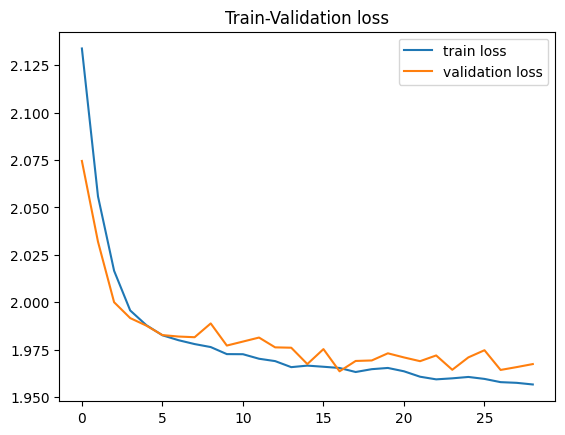

In [12]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100
mt.train_function_early_stop(model,num_epochs,dl_train,optimizer,early_stop = 10,dl_val = dl_val,save_path='m1_distilbert_simple_MULTI')

In [13]:
print("Accuracy evaluando en todas las etiquetas")
print(mt.eval_function_multi(model,dl_eval,['to','as','about'],"accuracy"))
print("Accuracy evaluando en etiquetas female")
print(mt.eval_function_gender(model,dl_eval,['to','as','about'],"accuracy",'female'))
print("Accuracy evaluando en etiquetas male")
print(mt.eval_function_gender(model,dl_eval,['to','as','about'],"accuracy",'male'))

Accuracy evaluando en todas las etiquetas
{'to': {'accuracy': 0.7146464646464646}, 'as': {'accuracy': 0.7079530638852672}, 'about': {'accuracy': 0.8469387755102041}}
Accuracy evaluando en etiquetas female
{'to': {'accuracy': 0.6902887139107612}, 'as': {'accuracy': 0.7142857142857143}, 'about': {'accuracy': 0.845}}
Accuracy evaluando en etiquetas male
{'to': {'accuracy': 0.7372262773722628}, 'as': {'accuracy': 0.702020202020202}, 'about': {'accuracy': 0.8489583333333334}}
